# Capítulo 10 — Projeto de Sistemas de Controle com Realimentação
## PARTE 1 — Teoria, LGR e especificações de projeto


In [2]:
# Instala bibliotecas necessárias para simulações no domínio da frequência e do tempo

!pip install control --quiet

import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

plt.rcParams['figure.figsize'] = (8,5)


## Definindo a planta de estudo

A planta utilizada como exemplo é:

\[
G(s) = \frac{1}{s(s+2)(s+4)}
\]

Ela representa um sistema de 3ª ordem instável na origem.
Vamos analisá-la ao longo do notebook.


In [3]:
# Define a função de transferência usada nos exemplos
num = [1]
den = [1,6,8,0]
G = ctrl.tf(num, den)
G


TransferFunction(
array([1]),
array([1, 6, 8, 0]),
outputs=1, inputs=1)

## Lugar das Raízes (Root Locus)

O LGR mostra como os polos de malha fechada se movem conforme variamos o ganho K.

Aqui analisamos:
- estabilidade para diferentes valores de K  
- direção das assíntotas  
- comportamento dos polos dominantes


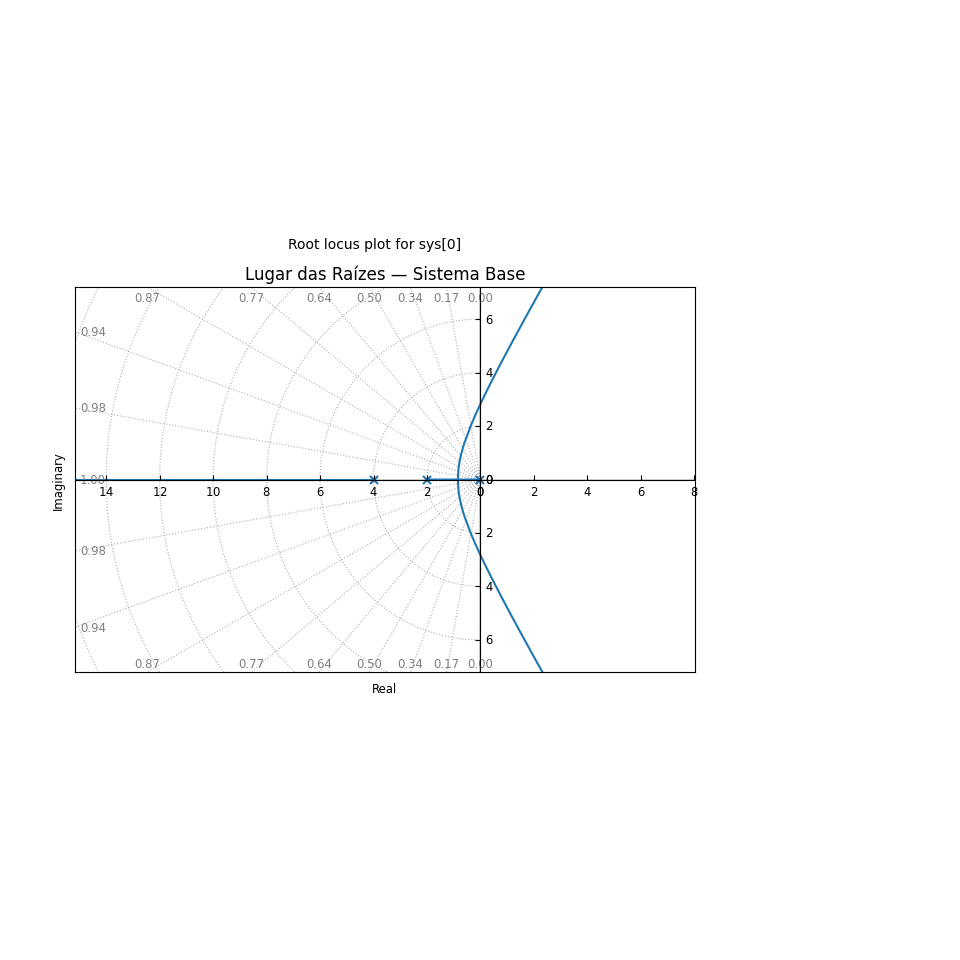

In [4]:
plt.figure()
ctrl.root_locus(G, grid=True)
plt.title("Lugar das Raízes — Sistema Base")
plt.show()


## Linhas de Amortecimento

Desenhamos curvas no plano-s para visualizar onde estão os polos com mesmo coeficiente de amortecimento ζ.

Aqui usamos:
- ζ = 0.5  
- mostra polos com mesmo overshoot


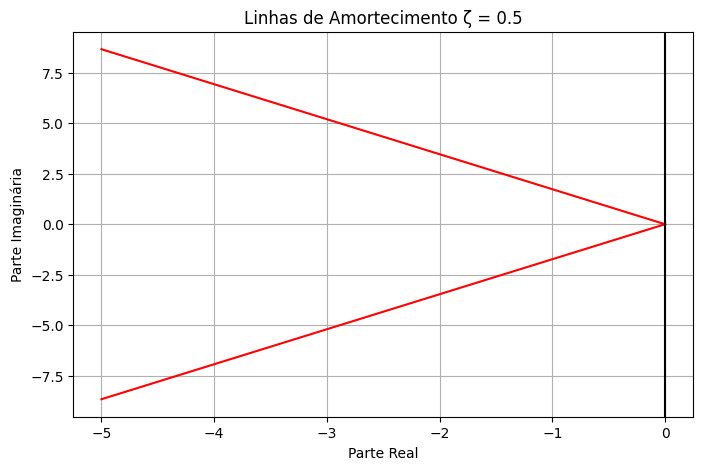

In [5]:
zeta = 0.5

wn = np.linspace(0,10,400)
sigma = -zeta * wn
wd = wn * np.sqrt(1 - zeta**2)

plt.plot(sigma, wd, 'r')
plt.plot(sigma, -wd, 'r')
plt.axvline(0, color='k')

plt.title("Linhas de Amortecimento ζ = 0.5")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginária")
plt.grid(True)


## Resposta ao Degrau para Vários Valores de K

A resposta ao degrau permite avaliar:
- rapidez do sistema  
- overshoot  
- estabilidade  

Simulamos a malha fechada para K = 1, 5, 10 e 50.


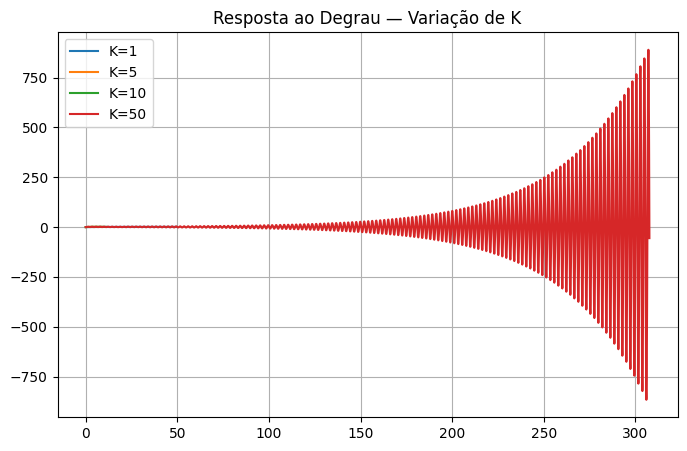

In [6]:
Ks = [1, 5, 10, 50]

plt.figure()
for K in Ks:
    T = ctrl.feedback(K*G, 1)
    t,y = ctrl.step_response(T)
    plt.plot(t,y,label=f"K={K}")

plt.title("Resposta ao Degrau — Variação de K")
plt.grid(True)
plt.legend()
plt.show()


## Margens de Ganho e Fase

A análise de margem indica:
- robustez  
- tendência à instabilidade  
- possibilidade de oscilação  

Aqui calculamos GM, PM, frequência de cruzamento etc.


In [7]:
gm, pm, wg, wp = ctrl.margin(G)

print("Margem de ganho (dB):", 20*np.log10(gm))
print("Margem de fase (deg):", pm)
print("Freq. cruzamento ganho:", wg)
print("Freq. cruzamento fase:", wp)


Margem de ganho (dB): 33.624824747511745
Margem de fase (deg): 84.64673032244428
Freq. cruzamento ganho: 2.82842712474619
Freq. cruzamento fase: 0.12469716902271294


## Diagrama de Bode

O Bode permite:
- avaliar estabilidade  
- verificar cruzamento de ganho  
- projetar compensadores  

Aqui geramos magnitude e fase.


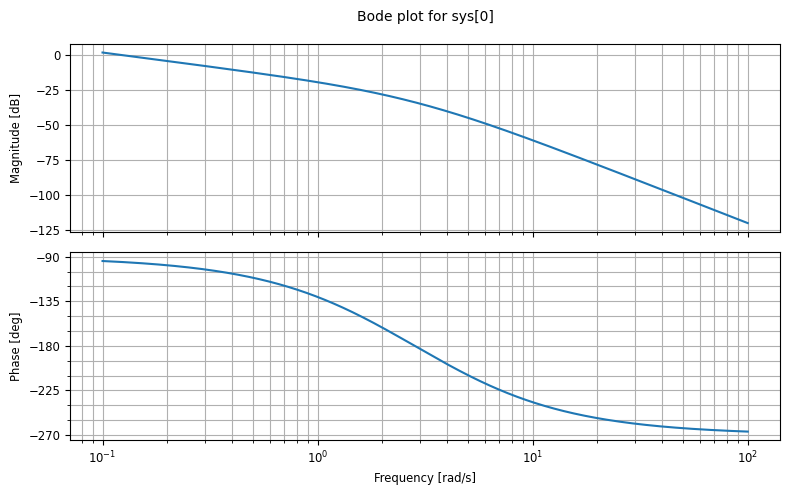

In [8]:
ctrl.bode_plot(G, dB=True)
plt.show()


## Funções de Sensibilidade

A sensibilidade mede:
- rejeição a distúrbios  
- robustez a variações da planta

Calculamos:
- Sensibilidade: S = 1 / (1+GH)
- Complementar: T = GH / (1+GH)


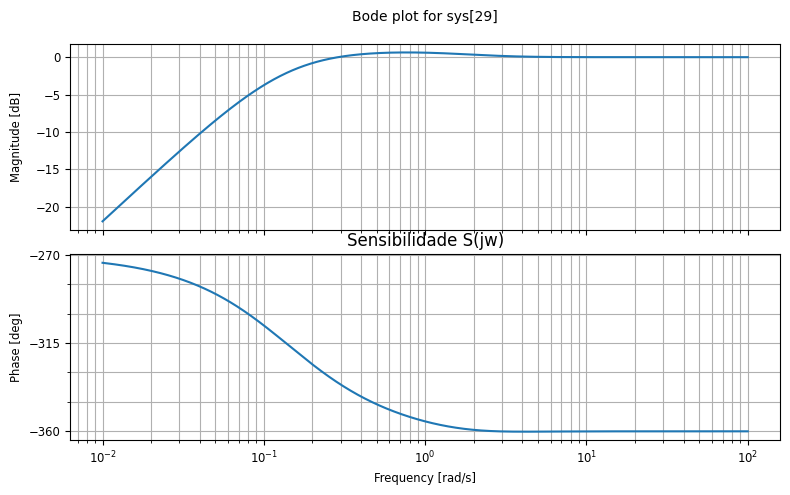

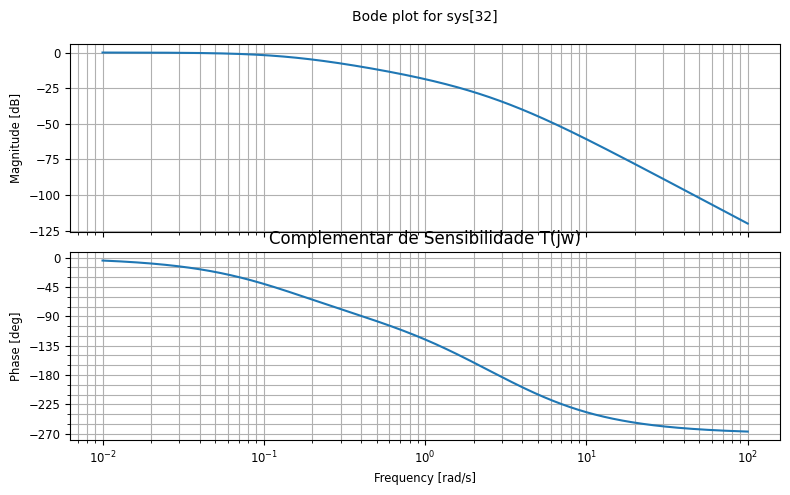

In [9]:
S = 1 / (1 + G)
T = G / (1 + G)

ctrl.bode_plot(S, dB=True)
plt.title("Sensibilidade S(jw)")
plt.show()

ctrl.bode_plot(T, dB=True)
plt.title("Complementar de Sensibilidade T(jw)")
plt.show()
